In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", family = "Malgun Gothic")

from IPython.core.display import display, HTML

# 글씨가 뭉게져서 보이는 것 같으면 아래의 설정을 통해서 개선할 수 있음
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import plotly.express as px

# from google.colab import drive
# drive.mount('/content/gdrive/')

plotly 시각화 라이브러리 참고자료
- https://dailyheumsi.tistory.com/118#2.-plotly-express-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0
- https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e

## 1. 데이터셋 관찰하기

In [2]:
trend = pd.read_csv('coronavirusdataset/trend.csv')
patient = pd.read_csv('coronavirusdataset/patient.csv')
time = pd.read_csv('coronavirusdataset/time.csv')
route = pd.read_csv('coronavirusdataset/route.csv')
case = pd.read_csv('coronavirusdataset/case.csv')

In [52]:
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "150%"),
    ("color", 'darkgreen')])]

output = ''
output += trend.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"trend {trend.shape}").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))
display(HTML("""<font color=coral>date</font> : Year-Month-Day <br>
            <font color=coral>cold</font> : the search volume of "cold" in Korean <br>
            <font color=coral>flu</font> : the search volume of 'flu' in Korean <br>
            <font color=coral>pneumonia</font> : the search volume of 'pneumonia' in Korean <br>
            <font color=coral>coronavirus</font> : the search volume of 'coronavirus' in Korean            
            """))
print("---------------------------------------------------------------------------------------------------------")
output = ''
output += patient.head(15).style.set_table_attributes("style='display:inline'").set_caption("patient").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))
display(HTML("""<font color=coral>patient_id</font> : the ID of the patient (n-th confirmed patient) <br>
            <font color=coral>sex</font> : the sex of the patient <br>
            <font color=coral>birth_year</font> : the birth year of the patient <br>
            <font color=coral>country</font> : the country of the patient <br>
            <font color=coral>region</font> : the region of the patient <br>
            <font color=coral>disease</font> : 0: no disease / 1: underlying disease <br>
            <font color=coral>group</font> : the collective infection <br>
            <font color=coral>infection_reason</font> : the reason of infection <br>
            <font color=coral>infection_order</font> : the order of infection <br>
            <font color=coral>infected_by</font> : the ID of who has infected the patient <br>
            <font color=coral>contact_number</font> : the number of contacts with people <br>
            <font color=coral>confirmed_date</font> : the date of confirmation <br>
            <font color=coral>released_date</font> : the date of discharge <br>
            <font color=coral>deceased_date</font> : the date of decease <br>
            <font color=coral>state</font> : isolated / released / deceased
            """))
print("---------------------------------------------------------------------------------------------------------")
output = ''
output += time.head(5).style.set_table_attributes("style='display:inline'").set_caption("time").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))
display(HTML("""<font color=coral>date</font> : Year-Month-Day <br>
            <font color=coral>time</font> : Time (0 = AM 12:00 / 16 = PM 04:00) <br>
            <font color=coral>test</font> : the accumulated number of tests (= negative + confirmed)<br>
            <font color=coral>negative</font> : the accumulated number of negative results <br>
            <font color=coral>confirmed</font> : the accumulated number of positive results <br>
            <font color=coral>released</font> : the accumulated number of releases <br>
            <font color=coral>deceased</font> : the accumulated number of deceases <br>
            <font color=coral>Seoul</font> : the accumulated number of the confirmed in Seoul <br>
            <font color=coral>Busan</font> : the accumulated number of the confirmed in Busan
            """))
print("---------------------------------------------------------------------------------------------------------")
output = ''
output += route.head().style.set_table_attributes("style='display:inline'").set_caption("route").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))
display(HTML("""<font color=coral>patient_id</font> : the ID of the patient (n-th confirmed patient) <br>
            <font color=coral>date</font> : Year-Month-Day <br>
            <font color=coral>province</font> : Special City / Metropolitan City / Province(-do) <br>
            <font color=coral>city</font> : City(-si) / Country (-gun) / District (-gu) <br>
            <font color=coral>visit</font> : the type of place visited <br>
            <font color=coral>latitude</font> : the latitude of the visit (WGS84) <br>
            <font color=coral>longitude</font> : the longitude of the visit (WGS84)
            """))
print("---------------------------------------------------------------------------------------------------------")
output = ''
output += case.head(5).style.set_table_attributes("style='display:inline'").set_caption("case").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))
display(HTML("""<font color=coral>case_id</font> : the ID of the infection case <br>
            <font color=coral>province</font> : Special City / Metropolitan City / Province(-do) <br>
            <font color=coral>city</font> : City(-si) / Country (-gun) / District (-gu) <br>
            <font color=coral>group</font> : TRUE: group infection / FALSE: not group <br>
            <font color=coral>infection_case</font> : the infection case (the name of group or other cases) <br>
            <font color=coral>confirmed</font> : the accumulated number of the confirmed <br>
            <font color=coral>latitude</font> : the latitude of the group (WGS84) <br>
            <font color=coral>longitude</font> : the longitude of the group (WGS84)
            """))

,date,cold,flu,pneumonia,coronavirus
0,2019-12-07,0.12408,0.24699,0.22144,0.01309
1,2019-12-08,0.11863,0.2539,0.19617,0.00836
2,2019-12-09,0.16308,0.4788,0.3318,0.01272


---------------------------------------------------------------------------------------------------------


,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984,China,filtered at airport,nan,nan,visit to Wuhan,1,nan,45,2020-01-20,2020-02-06,nan,released
1,2,male,1964,Korea,filtered at airport,nan,nan,visit to Wuhan,1,nan,75,2020-01-24,2020-02-05,nan,released
2,3,male,1966,Korea,capital area,nan,nan,visit to Wuhan,1,nan,16,2020-01-26,2020-02-12,nan,released
3,4,male,1964,Korea,capital area,nan,nan,visit to Wuhan,1,nan,95,2020-01-27,2020-02-09,nan,released
4,5,male,1987,Korea,capital area,nan,nan,visit to Wuhan,1,nan,31,2020-01-30,2020-03-02,nan,released
5,6,male,1964,Korea,capital area,nan,nan,contact with patient,2,3,17,2020-01-30,2020-02-19,nan,released
6,7,male,1991,Korea,capital area,nan,nan,visit to Wuhan,1,nan,9,2020-01-30,2020-02-15,nan,released
7,8,female,1957,Korea,Jeollabuk-do,nan,nan,visit to Wuhan,1,nan,113,2020-01-31,2020-02-12,nan,released
8,9,female,1992,Korea,capital area,nan,nan,contact with patient,2,5,2,2020-01-31,2020-02-24,nan,released
9,10,female,1966,Korea,capital area,nan,nan,contact with patient,3,6,43,2020-01-31,2020-02-19,nan,released


---------------------------------------------------------------------------------------------------------


,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


---------------------------------------------------------------------------------------------------------


,patient_id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.4605,126.441
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.4788,126.669
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.5621,126.802
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.5675,127.006
4,3,2020-01-20,Incheon,Jung-gu,airport,37.4605,126.441


---------------------------------------------------------------------------------------------------------


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1,Seoul,Guro-gu,True,Guro-gu Call Center,70,37.508163,126.884387
1,2,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
2,3,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
3,4,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
4,5,Seoul,Dongdaemun-gu,True,Dongan Church,9,37.592888,127.056766


## 2. 결측치 확인

In [59]:
# 이 셀은 단순 함수 정의입니다.
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'red')])]


def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").background_gradient(cmap='summer').set_caption(caption).set_table_styles(styles)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
    
def display_side_by_side2(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption).set_table_styles(styles)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [60]:
# 각 데이터셋들의 결측치 확인
trend_null = pd.DataFrame(trend.isnull().sum()).rename(columns={0:"nulls"}) #checking for total null values
patient_null = pd.DataFrame(patient.isnull().sum()).rename(columns={0:"nulls"}) #checking for total null values
time_null = pd.DataFrame(time.isnull().sum()).rename(columns={0:"nulls"}) #checking for total null values
route_null = pd.DataFrame(route.isnull().sum()).rename(columns={0:"nulls"}) #checking for total null values
case_null = pd.DataFrame(case.isnull().sum()).rename(columns={0:"nulls"}) #checking for total null values

display_side_by_side([trend_null, patient_null, time_null, route_null, case_null], ['trend_null' , 'patient_null', 'time_null', 'route_null', 'case_null'])

,nulls
date,0
cold,0
flu,0
pneumonia,0
coronavirus,0
,nulls
patient_id,0
sex,7190
birth_year,7203
country,0


#### 확인 결과
- 각 데이터셋의 결측치들을 분석한 결과, **paitent** 데이터셋에서의 결측치가 많았습니다.
- route 데이터셋과 case 데이터셋에서 latitude(위도), longtitude(경도)과 같은 column들에서는 사실상 null값이라고 할 수 있는 '-'값이 많았는데 follium 모듈을 이용한 시각화를 하는 것에만 사용될 것 같아서 큰 의의를 두지 않지 않겠습니다.
- 결측치 handling은 patient 데이터셋에서만 하면 된다는 결론을 얻었습니다.

## 3. Trend

In [63]:
print(trend.dtypes)
print('\n')
print("shape of trend : ", trend.shape)
display_side_by_side2([trend.head(8), trend.describe(), trend_null], ['trend', 'trend_describe', 'trend_null'])

date            object
cold           float64
flu            float64
pneumonia      float64
coronavirus    float64
dtype: object


shape of trend :  (96, 5)


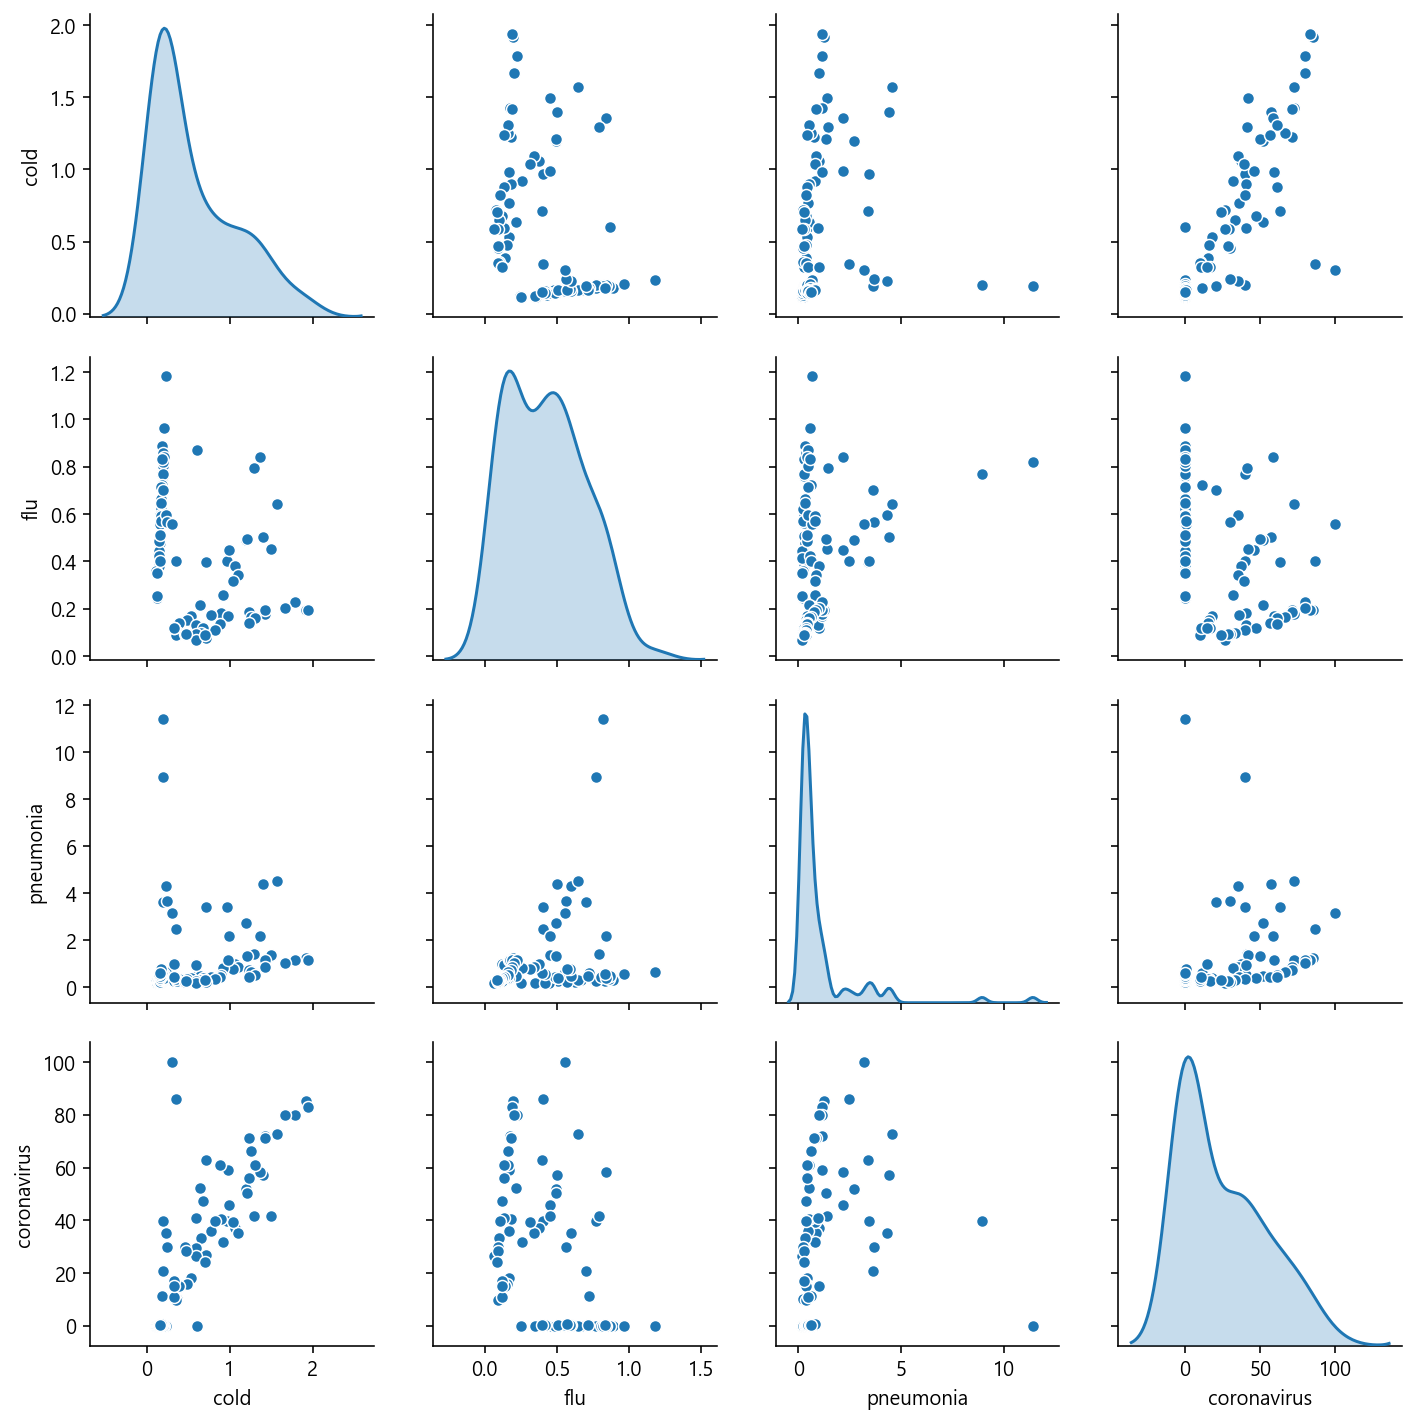

In [7]:
sns.pairplot(trend[["cold", "flu", "pneumonia", "coronavirus"]], diag_kind="kde")

In [22]:
# time-series_cold
fig1 = px.line(trend, x="date", y="cold", title='time serise cold')
fig1.update_layout(height=400, width=900)
fig1.show()

# time-series_flu
fig2 = px.line(trend, x="date", y="flu", title='time serise flu')
fig2.update_layout(height=400, width=900)
fig2.show()

# time-series_pneumonia
fig3 = px.line(trend, x="date", y="pneumonia", title='time serise pneumonia')
fig3.update_layout(height=400, width=900)
fig3.show()

# time-series_coronavirus
fig4 = px.line(trend, x="date", y="coronavirus", title='time serise coronavirus')
fig4.update_layout(height=400, width=900)
fig4.show()


# # 이건 plotly의 subplot을 이용함
# fig = make_subplots(rows=1, cols=2)

# fig.add_trace(
#     go.Scatter(x=trend["date"], y=trend["cold"]),
#     row=1, col=1
# )

# fig.add_trace(
#     go.Scatter(x=trend["date"], y=trend["flu"]),
#     row=1, col=2
# )

# fig.update_layout(height=600, width=1000, title_text="Subplots")
# fig.show()

## 4. patient

In [64]:
print(patient.dtypes)
print('\n')
print("shape of patient : ", patient.shape)
# display(trend.describe())
# display(trend.head(3))
display_side_by_side2([patient.head(8), patient.describe(), patient_null], ['patient', 'patient_describe', "patient_null"])

patient_id            int64
sex                  object
birth_year          float64
country              object
region               object
disease             float64
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object


shape of patient :  (7869, 15)


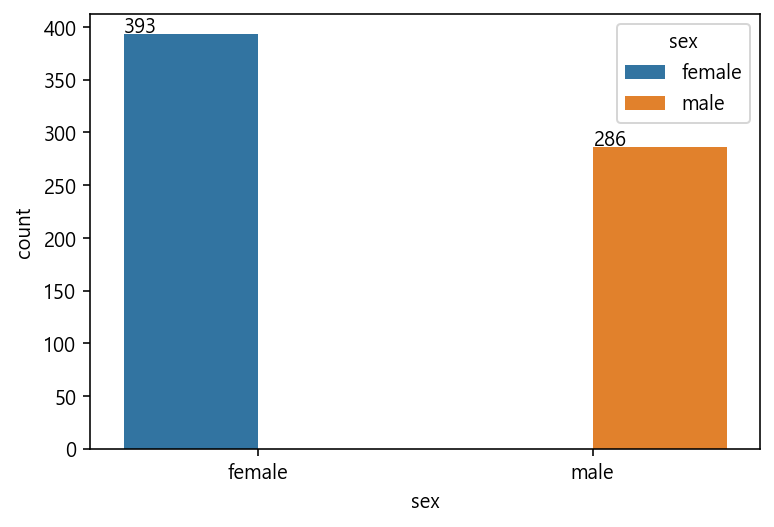

In [77]:
# print(patient.sex.value_counts())
fig = sns.countplot(x="sex", hue="sex", data=patient)
for p in fig.patches:
    fig.annotate(str(p.get_height())[:3], (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [39]:
patient["country"].value_counts()

Korea       7860
China          8
Mongolia       1
Name: country, dtype: int64

                                   infection_reason
contact with patient                             76
visit to Daegu                                   50
visit to Wuhan                                    8
pilgrimage to Israel                              6
contact with patient in Singapore                 2
visit to China                                    2
residence in Wuhan                                2
visit to Thailand                                 2
visit to Italy                                    1
contact with patient in Daegu                     1
visit to Vietnam                                  1
contact with patient in Japan                     1
visit to Japan                                    1
visit to ooo                                      1


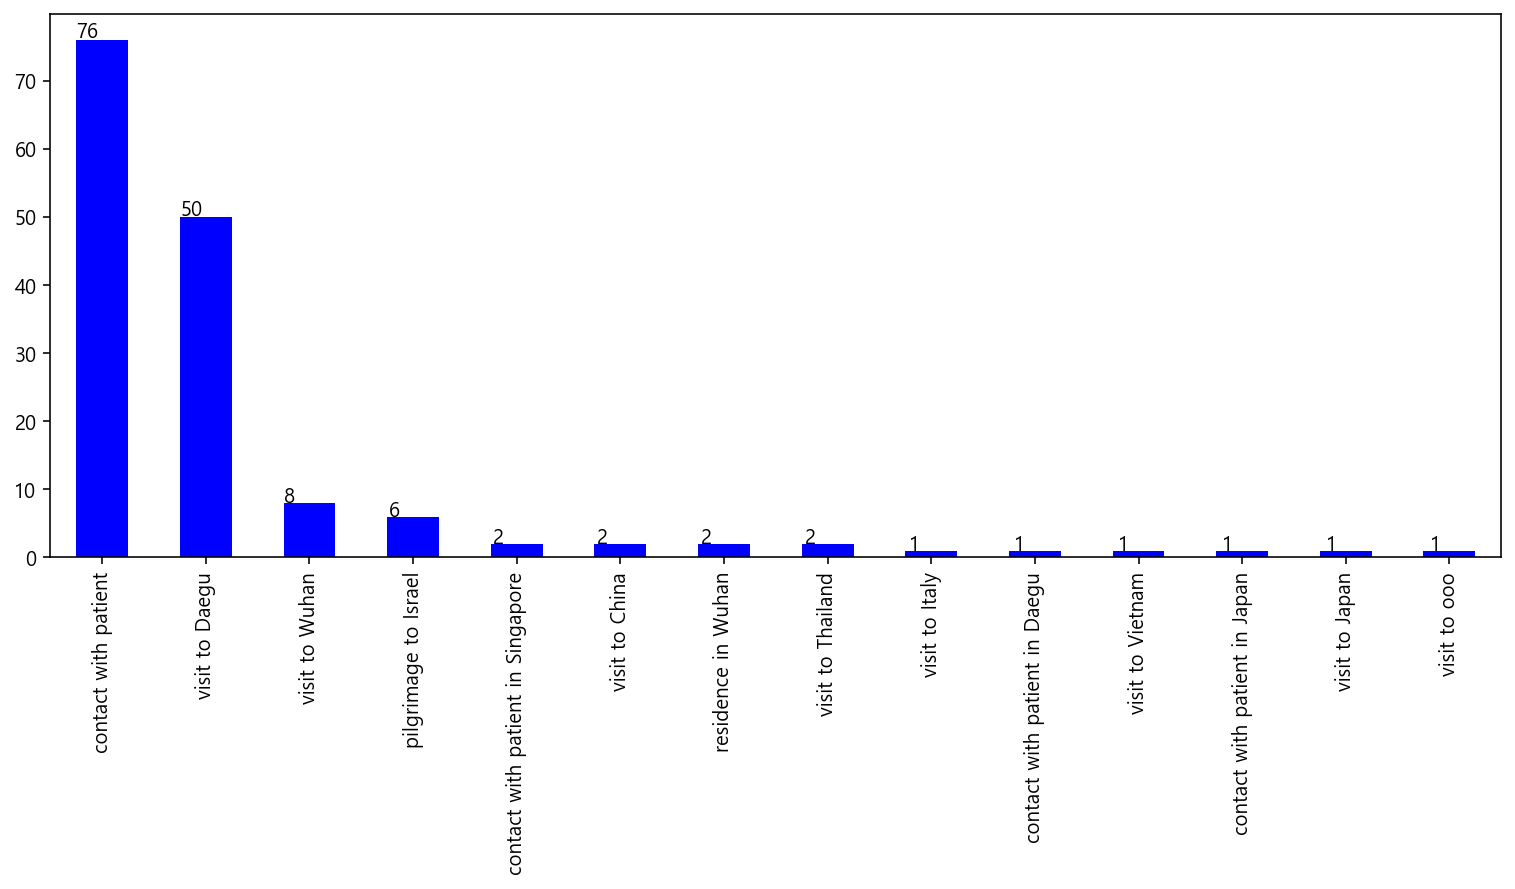

In [91]:
print(pd.DataFrame(patient.infection_reason.value_counts()))
fig = plt.figure(figsize=(13,5))
fig = patient.infection_reason.value_counts().plot(kind='bar', color='blue')
for p in fig.patches:
    fig.annotate(str(p.get_height())[:3], (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

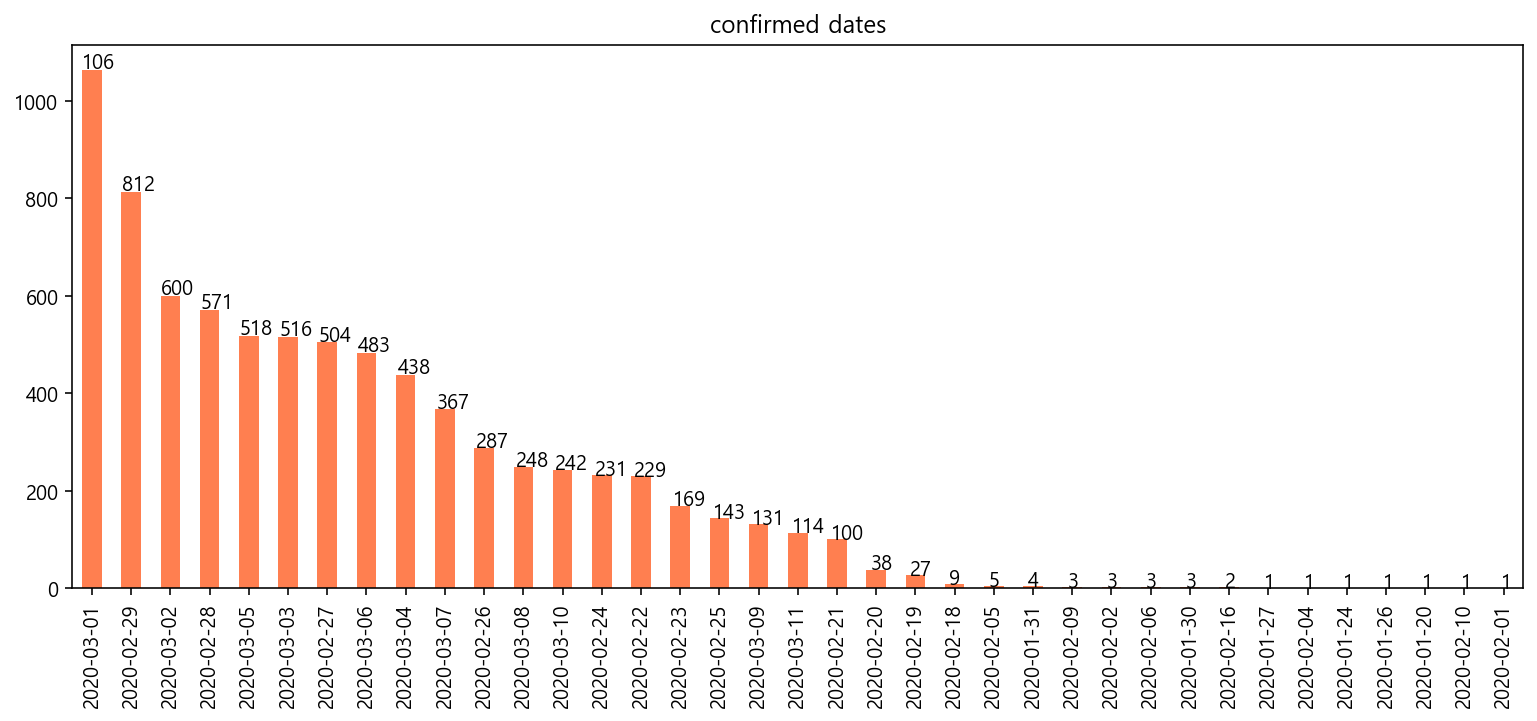

In [106]:
# check the confirmed dates

fig = plt.figure(figsize=(13,5))
fig = patient.confirmed_date.value_counts().plot(kind='bar', color='coral')
for p in fig.patches:
    fig.annotate(str(p.get_height())[:3], (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("confirmed dates")
plt.show()

In [6]:
print(patient.shape)
patient.isnull().sum() #checking for total null values
patient.loc[patient['sex'].notnull()]

(7869, 15)


,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,5581,male,2013.0,Korea,capital area,NaN,NaN,contact with patient,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5766,5767,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
5767,5768,female,1935.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
6284,6285,female,1929.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,2020-03-04,deceased
